# Librerias

In [2]:
'''Importacion de librerias'''
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

# Cargar y leer dataset csv

In [3]:
"""Carga de dataset"""
df = pandas.read_csv('DATOS.csv')
df

,Edad,Declaraciones,Pais,Estadoactual
0,56,9,Ecuador,SI
1,50,7,Ecuador,SI
2,43,8,Ecuador,NO
3,44,2,Peru,SI
4,51,4,Colombia,NO
...,...,...,...,...
995,43,4,Peru,NO
996,44,6,Ecuador,NO
997,31,11,Ecuador,SI
998,31,4,Ecuador,SI


# Representar los valores alfanuméricos del dataset

#### En esta sección se reemplazaran los valores no numéricos por numéricos

In [4]:
'''Reemplazo de valores no numericos'''
#Asignamos valor de 0 1 2 correspondientemente a los paises
d1 = {'Ecuador': 0, 'Peru': 1, 'Colombia': 2}
df['Pais'] = df['Pais'].map(d1)
#Asignamos valor de 0 1 a los valores de SI y NO
d2 = {'SI': 1, 'NO': 0}
df['Estadoactual'] = df['Estadoactual'].map(d2)
#Imprimimos la tabla
df

,Edad,Declaraciones,Pais,Estadoactual
0,56,9,0,1
1,50,7,0,1
2,43,8,0,0
3,44,2,1,1
4,51,4,2,0
...,...,...,...,...
995,43,4,1,0
996,44,6,0,0
997,31,11,0,1
998,31,4,0,1


# Elegir características

#### Se seleccionan columnas de las que intentamos predecir. Se deben elegir las columnas que aportarán más al objetivo del modelo. 

In [5]:
'''Creamos variable features y la almacenamos dentro de una variable x dentro de un array'''
features = ['Edad', 'Declaraciones', 'Pais']
X = df[features]

In [6]:
'''Seleccionamos el objetivo y lo almacenamos dentro de la variable y'''
y = df['Estadoactual']

#### Imprimimos 'x ' y 'y '

In [7]:
print(X, y, sep='\n\n')

     Edad  Declaraciones  Pais
0      56              9     0
1      50              7     0
2      43              8     0
3      44              2     1
4      51              4     2
..    ...            ...   ...
995    43              4     1
996    44              6     0
997    31             11     0
998    31              4     0
999    30              3     0

[1000 rows x 3 columns]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    1
Name: Estadoactual, Length: 1000, dtype: int64


# Creación de árbol de decisiones

#### Utilizando DecisionTreeClassifier6 de la librería sklearn. Mediante método “fit” construya un clasificador de árbol de decisión a partir del conjunto de entrenamiento (X, y). 

In [14]:
'''Creacion de arbol de decisiones'''
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)

# Visualizar el árbol de decisiones

In [15]:
'''Guardar el árbol de decisiones como una imagen utilizando pydotplus.'''
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


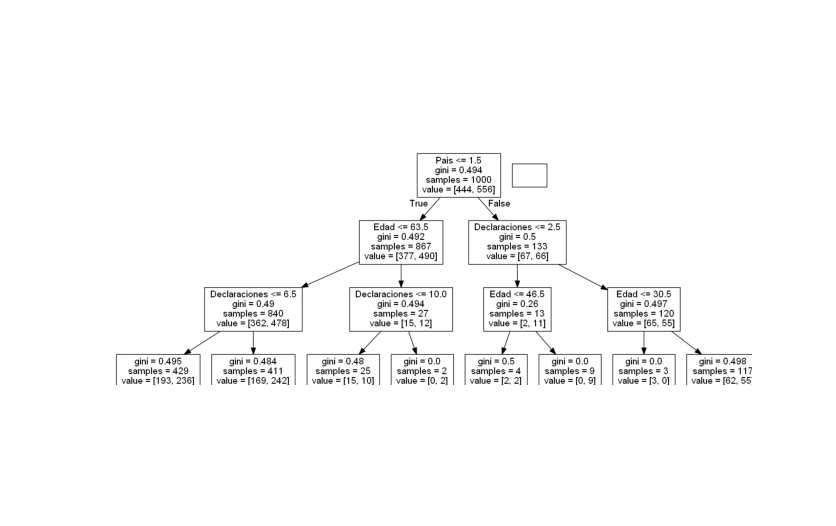

In [16]:
'''visualizamos el árbol de decisión utilizando la librería matplotlib'''
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()